In [37]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_76005/3687693762.py:107: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_76005/3687693762.py:118: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_76005/3687693762.py:223: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_76005/3687693762.py:234: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


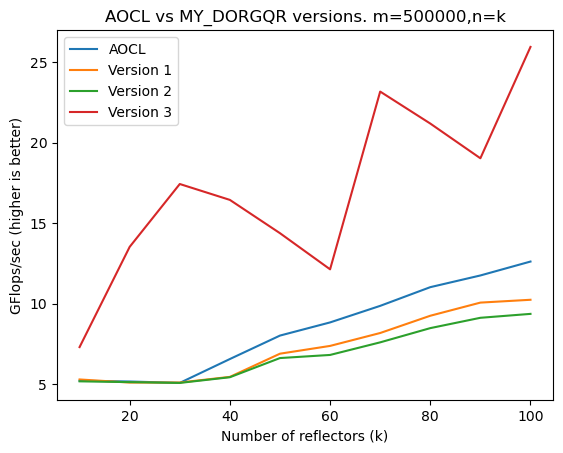

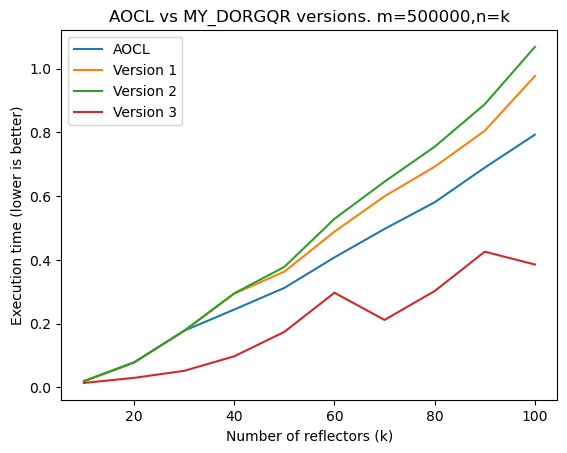

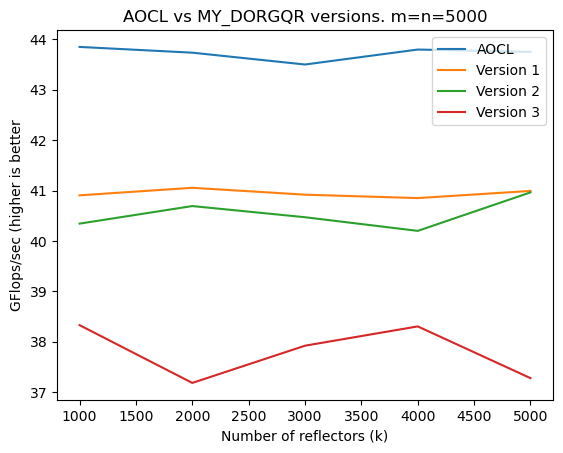

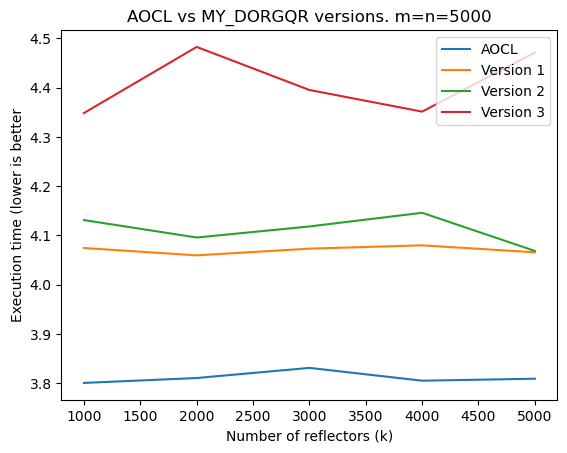

In [39]:
# This notebook/script is responsible for parsing the times_v*.txt files.

#version1File = open("times_v1.txt")
file = open("courseResults.txt")
lines = file.readlines()
nVec = []
kVec = []
aocl=False
version1=False
version2=False
version3=False
aoclTime = []
v1Time = []
v2Time = []
v3Time = []
aoclFlop = []
v1Flop = []
v2Flop = []
v3Flop = []
for line in lines:
    if(line[0] =='T'):
        continue
    if(line[0]=='S'):
        break
    if(line[1]=='='):
        lineVec = line.split()
        m = int(lineVec[0][2:])
        n = int(lineVec[1][2:])
        k = int(lineVec[2][2:])
        nVec.append(n)
        kVec.append(k)
        continue
    if(line[0]=='A'):
        aocl=True
        version1=False
        version2=False
        version3=False
        continue
    if(line[1]=='y'):
        lineVec = line.split()
        vNum=lineVec[0][-1]
        if(vNum=='1'):
            version1=True
            version2=False
            version3=False
            aocl=False
        elif(vNum=='2'):
            version2=True
            version1=False
            version3=False
            aocl=False
        elif(vNum=='3'):
            version3=True
            version1=False
            version2=False
            aocl=False
        continue
    # reaching here means that we are in a line of the form executionTime:GFlops/sec
    lineVec = line.split(':')
    try:
        tmpFlop = float(lineVec[1])
        tmpTime = float(lineVec[0])
    except:
        print(line)
        continue
    if(aocl):
        if(len(kVec)!=len(aoclFlop)):
            aoclFlop.append(tmpFlop)
            aoclTime.append(tmpTime)
        else:
            if(aoclFlop[-1] < tmpFlop):
                aoclFlop[-1] = tmpFlop
                aoclTime[-1] = tmpTime
    elif(version1):
        if(len(kVec)!=len(v1Flop)):
            v1Flop.append(tmpFlop)
            v1Time.append(tmpTime)
        else:
            if(v1Flop[-1] < tmpFlop):
                v1Flop[-1] = tmpFlop
                v1Time[-1] = tmpTime
    elif(version2):
        if(len(kVec)!=len(v2Flop)):
            v2Flop.append(tmpFlop)
            v2Time.append(tmpTime)
        else:
            if(v2Flop[-1] < tmpFlop):
                v2Flop[-1] = tmpFlop
                v2Time[-1] = tmpTime
    elif(version3):
        if(len(kVec)!=len(v3Flop)):
            v3Flop.append(tmpFlop)
            v3Time.append(tmpTime)
        else:
            if(v3Flop[-1] < tmpFlop):
                v3Flop[-1] = tmpFlop
                v3Time[-1] = tmpTime
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m={},n=k".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("GFlops/sec (higher is better)")
ax.plot(kVec,aoclFlop,label="AOCL")
ax.plot(kVec,v1Flop,label="Version 1")
ax.plot(kVec,v2Flop,label="Version 2")
ax.plot(kVec,v3Flop,label="Version 3")
ax.legend()
fig.show()
fig.savefig("courseImage_RectPerf.png")
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m={},n=k".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("Execution time (lower is better)")
ax.plot(kVec,aoclTime,label="AOCL")
ax.plot(kVec,v1Time,label="Version 1")
ax.plot(kVec,v2Time,label="Version 2")
ax.plot(kVec,v3Time,label="Version 3")
ax.legend()
fig.show()
fig.savefig("courseImage_RectTime.png")

nVec = []
kVec = []
aocl=False
version1=False
version2=False
version3=False
aoclTime = []
v1Time = []
v2Time = []
v3Time = []
aoclFlop = []
v1Flop = []
v2Flop = []
v3Flop = []
reachedSquare=False
for line in lines:
    if(line[0]!='S' and not reachedSquare):
        continue
    elif(line[0]=='S'):
        reachedSquare=True
        continue
    if(line[1]=='='):
        lineVec = line.split()
        m = int(lineVec[0][2:])
        n = int(lineVec[1][2:])
        k = int(lineVec[2][2:])
        nVec.append(n)
        kVec.append(k)
        continue
    if(line[0]=='A'):
        aocl=True
        version1=False
        version2=False
        version3=False
        continue
    if(line[1]=='y'):
        lineVec = line.split()
        vNum=lineVec[0][-1]
        if(vNum=='1'):
            version1=True
            version2=False
            version3=False
            aocl=False
        elif(vNum=='2'):
            version2=True
            version1=False
            version3=False
            aocl=False
        elif(vNum=='3'):
            version3=True
            version1=False
            version2=False
            aocl=False
        continue
    lineVec = line.split(':')
    try:
        tmpFlop = float(lineVec[1])
        tmpTime = float(lineVec[0])
    except:
        print(line)
        continue
    if(aocl):
        if(len(kVec)!=len(aoclFlop)):
            aoclFlop.append(tmpFlop)
            aoclTime.append(tmpTime)
        else:
            if(aoclFlop[-1] < tmpFlop):
                aoclFlop[-1] = tmpFlop
                aoclTime[-1] = tmpTime
    elif(version1):
        if(len(kVec)!=len(v1Flop)):
            v1Flop.append(tmpFlop)
            v1Time.append(tmpTime)
        else:
            if(v1Flop[-1] < tmpFlop):
                v1Flop[-1] = tmpFlop
                v1Time[-1] = tmpTime
    elif(version2):
        if(len(kVec)!=len(v2Flop)):
            v2Flop.append(tmpFlop)
            v2Time.append(tmpTime)
        else:
            if(v2Flop[-1] < tmpFlop):
                v2Flop[-1] = tmpFlop
                v2Time[-1] = tmpTime
    elif(version3):
        if(len(kVec)!=len(v3Flop)):
            v3Flop.append(tmpFlop)
            v3Time.append(tmpTime)
        else:
            if(v3Flop[-1] < tmpFlop):
                v3Flop[-1] = tmpFlop
                v3Time[-1] = tmpTime
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m=n={}".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("GFlops/sec (higher is better")
ax.plot(kVec,aoclFlop,label="AOCL")
ax.plot(kVec,v1Flop,label="Version 1")
ax.plot(kVec,v2Flop,label="Version 2")
ax.plot(kVec,v3Flop,label="Version 3")
ax.legend()
fig.show()
fig.savefig("courseImage_SquarePerf.png")
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m=n={}".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("Execution time (lower is better")
ax.plot(kVec,aoclTime,label="AOCL")
ax.plot(kVec,v1Time,label="Version 1")
ax.plot(kVec,v2Time,label="Version 2")
ax.plot(kVec,v3Time,label="Version 3")
ax.legend()
fig.show()
fig.savefig("courseImage_SquareTime.png")
file.close()